In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os

In [3]:
cwd=os.getcwd()
os.listdir(cwd)

['Untitled.ipynb',
 '.ipynb_checkpoints',
 'plane_crash_data.ipynb',
 'plane_crash.csv']

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
#import the dataset
dataset=pd.read_csv("plane_crash.csv")
dataset.head()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",c 18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...


In [7]:
dataset["summary"]

0       During a demonstration flight, a U.S. Army fly...
1       Eugene Lefebvre was the first pilot to ever be...
2       First U.S. dirigible Akron exploded just offsh...
3       The first fatal airplane accident in Canada oc...
4       The airship flew into a thunderstorm and encou...
                              ...                        
5778    Shortly after takeoff from runway 29, the left...
5779    The vintage aircraft crashed onto Piz Segnas m...
5780    The aircraft was approaching for a landing at ...
5781    The airliner crashed into the Jakarta Sea, 13 ...
5782    After taking off and reaching FL200, the crew ...
Name: summary, Length: 5783, dtype: object

In [9]:
#you can check the information of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 13 columns):
date            5783 non-null object
time            5783 non-null object
location        5783 non-null object
operator        5783 non-null object
flight_no       5783 non-null object
route           5783 non-null object
ac_type         5783 non-null object
registration    5783 non-null object
cn_ln           5783 non-null object
aboard          5783 non-null object
fatalities      5783 non-null object
ground          5783 non-null object
summary         5783 non-null object
dtypes: object(13)
memory usage: 587.5+ KB


In [11]:
dataset.replace('?', np.nan, inplace=True)
dataset.head()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",c 18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...


In [12]:
#checking is some null values are there
#checking the groupwise null values in all the attributes
dataset.isnull().any()
#very important any() returns you the boolean value if any attributes have any value present

date            False
time             True
location         True
operator         True
flight_no        True
route            True
ac_type          True
registration     True
cn_ln            True
aboard          False
fatalities      False
ground           True
summary          True
dtype: bool

In [13]:
#can we calculate how many null values in each attribute is there
#yes we can do this

dataset.isnull().sum()

date               0
time            2108
location           6
operator          21
flight_no       4436
route           1494
ac_type           24
registration     352
cn_ln           1207
aboard             0
fatalities         0
ground            52
summary          231
dtype: int64

In [18]:
#seeing a number of unique items in each attribute and their frequency of occuring
dataset["route"].value_counts().head()

Training                      95
Sightseeing                   42
Test flight                   20
Sao Paulo - Rio de Janeiro     7
Test                           7
Name: route, dtype: int64

In [21]:
dataset["route"].unique()

array(['Demonstration', 'Air show', 'Test flight', ..., 'Pohnpei - Chuuk',
       'Jakarta - Pangkal Pinang', 'Georgetown - Toronto'], dtype=object)

In [22]:
dataset.columns

Index(['date', 'time', 'location', 'operator', 'flight_no', 'route', 'ac_type',
       'registration', 'cn_ln', 'aboard', 'fatalities', 'ground', 'summary'],
      dtype='object')

In [23]:
#very basic stratergy followed by any of the eda specialist is that you can remove the columns which has mostly zero
dataset.drop(['registration','time','route','cn_ln','flight_no'],inplace=True,axis=1)
dataset.head()

,date,location,operator,ac_type,aboard,fatalities,ground,summary
0,"September 17, 1908","Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909","Juvisy-sur-Orge, France",NaN,Wright Byplane,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912","Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913","Victoria, British Columbia, Canada",Private,Curtiss seaplane,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...


In [24]:
dataset.isnull().sum()

date            0
location        6
operator       21
ac_type        24
aboard          0
fatalities      0
ground         52
summary       231
dtype: int64

In [25]:
dataset["ac_type"].value_counts().head()

Douglas DC-3                                341
de Havilland Canada DHC-6 Twin Otter 300     86
Douglas C-47A                                74
Douglas C-47                                 67
Douglas DC-4                                 41
Name: ac_type, dtype: int64

In [26]:
dataset["summary"].replace(np.nan,' ',inplace=True)
dataset.head()

,date,location,operator,ac_type,aboard,fatalities,ground,summary
0,"September 17, 1908","Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909","Juvisy-sur-Orge, France",NaN,Wright Byplane,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912","Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913","Victoria, British Columbia, Canada",Private,Curtiss seaplane,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...


In [27]:
#Again after replacing the value just see the number of null values
dataset.isnull().sum()

date           0
location       6
operator      21
ac_type       24
aboard         0
fatalities     0
ground        52
summary        0
dtype: int64

In [28]:
dataset.shape

(5783, 8)

In [29]:
dataset.dropna(inplace=True)

In [30]:
dataset.shape

(5696, 8)

In [31]:
dataset.isnull().sum()

date          0
location      0
operator      0
ac_type       0
aboard        0
fatalities    0
ground        0
summary       0
dtype: int64

In [32]:
dataset.columns

Index(['date', 'location', 'operator', 'ac_type', 'aboard', 'fatalities',
       'ground', 'summary'],
      dtype='object')

In [33]:
dataset["date"].head()

0    September 17, 1908
2         July 12, 1912
3       August 06, 1913
4    September 09, 1913
5      October 17, 1913
Name: date, dtype: object

In [35]:
#changing the date format given in the data using pd.to_datetime
dataset["date"]=pd.to_datetime(dataset["date"])
dataset.head()

,date,location,operator,ac_type,aboard,fatalities,ground,summary
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...
4,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...
5,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30 (passengers:? crew:?),30 (passengers:? crew:?),0,Hydrogen gas which was being vented was sucked...


In [36]:
#now we are separating the date ,month ,year and making the new columns
dataset["month"]=dataset["date"].apply(lambda x : x.month)
dataset["year"]=dataset["date"].apply(lambda x : x.year)
dataset["day"]=dataset["date"].apply(lambda x: x.day)

In [37]:
dataset.head()

,date,location,operator,ac_type,aboard,fatalities,ground,summary,month,year,day
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly...",9,1908,17
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...,7,1912,12
3,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...,8,1913,6
4,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...,9,1913,9
5,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30 (passengers:? crew:?),30 (passengers:? crew:?),0,Hydrogen gas which was being vented was sucked...,10,1913,17


In [39]:
#extracting some useful data using regular expression
import re
dataset['Fatalities1']=dataset['fatalities'].apply(lambda x: re.search(r'[0-9]+',x).group(0))
dataset.head()

,date,location,operator,ac_type,aboard,fatalities,ground,summary,month,year,day,Fatalities,Fatalities1
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly...",9,1908,17,1,"<re.Match object; span=(0, 1), match='1'>"
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...,7,1912,12,5,"<re.Match object; span=(0, 1), match='5'>"
3,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...,8,1913,6,1,"<re.Match object; span=(0, 1), match='1'>"
4,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...,9,1913,9,14,"<re.Match object; span=(0, 2), match='14'>"
5,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30 (passengers:? crew:?),30 (passengers:? crew:?),0,Hydrogen gas which was being vented was sucked...,10,1913,17,30,"<re.Match object; span=(0, 2), match='30'>"


In [41]:
dataset.drop(["Fatalities1"],inplace=True,axis=1)

In [42]:
dataset.head()

,date,location,operator,ac_type,aboard,fatalities,ground,summary,month,year,day,Fatalities
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly...",9,1908,17,1
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...,7,1912,12,5
3,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...,8,1913,6,1
4,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...,9,1913,9,14
5,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30 (passengers:? crew:?),30 (passengers:? crew:?),0,Hydrogen gas which was being vented was sucked...,10,1913,17,30


Text(0, 0.5, 'Number of Crashes')

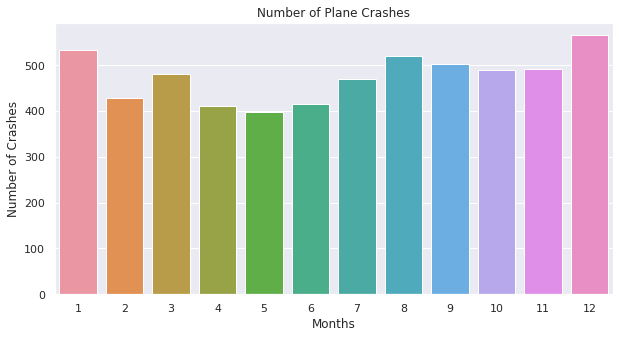

In [47]:
#Average crashes per month
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[10,5]
sns.set()
sns.barplot(dataset["month"].value_counts().index,dataset["month"].value_counts().get_values(),data=dataset)
plt.title("Number of Plane Crashes")
plt.xlabel("Months")
plt.ylabel("Number of Crashes")

Text(0, 0.5, 'Plane Crashes')

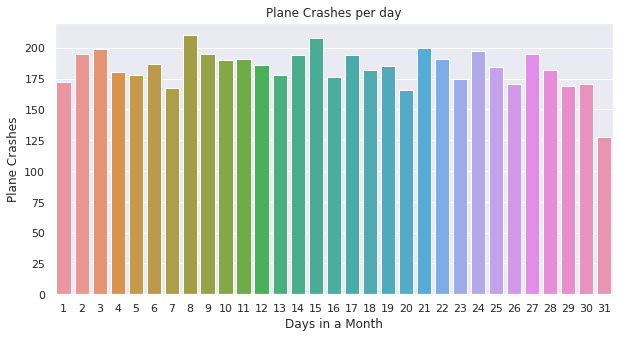

In [49]:
#second plot shows the crashes per day in a single month
sns.barplot(dataset["day"].value_counts().index,dataset["day"].value_counts().get_values(),data=dataset)
plt.title("Plane Crashes per day")
plt.xlabel("Days in a Month")
plt.ylabel("Plane Crashes")

Text(0, 0.5, 'Mean Of Fatalities')

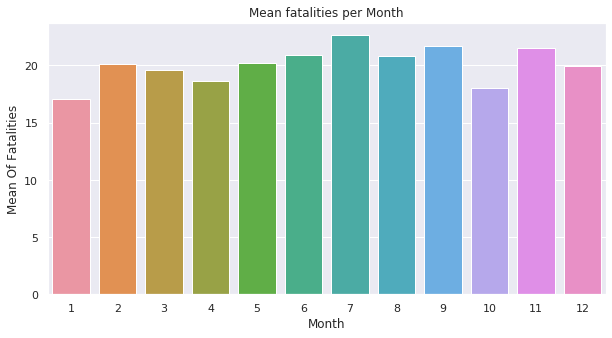

In [50]:
#3rd important visualization is the average fatalitities per month
dataset['Fatalities']=dataset["Fatalities"].astype('int64')
fatalities_by_month=dataset.groupby('month')['Fatalities'].mean()
sns.barplot(fatalities_by_month.index,fatalities_by_month.get_values())
plt.title("Mean fatalities per Month")
plt.xlabel("Month")
plt.ylabel("Mean Of Fatalities")

In [ ]:
#Conclusion is the july month has the maximum fatalities